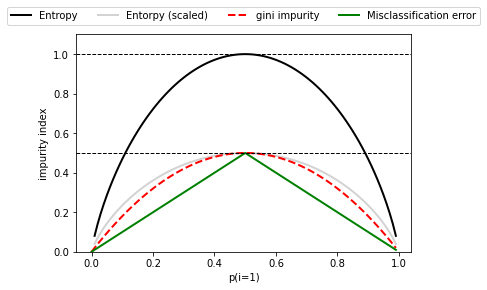

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
    return (p)*(1-p)+(1-p)*(1-(1-p)) #이진 분류기 이니깐
def entropy(p):
    return -((p)*np.log2(p)+(1-p)*np.log2(1-p))
def error(p):
    return 1-np.max([p, 1-p])
x = np.arange(0.0, 1.0, 0.01) #각 노드의 샘플 비율 p
ent = [entropy(p) if p !=0 else None for p in x ] #샘플 비율이 0이아니면 엔트로피
sc_ent = [e*0.5 if e else None for e in ent] 
err = [error(i) for i in x] #분류 오류 불순도. 최대 1, 최소 0
fig = plt.figure()
ax = plt.subplot(111)
###4개의 리스트를 y로 4개의 그래프 겹쳐 그리기
for i, lab, ls ,c in zip([ent,sc_ent,gini(x),err],
                         ['Entropy', 'Entorpy (scaled)','gini impurity', 'Misclassification error'],
                        ['-','-','--','-'],
                        ['black','lightgray','red','green','cyan']):
    line = ax.plot(x,i,label=lab,linestyle=ls, lw=2,color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5,1.15), ncol=5, fancybox=True,shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')
plt.show()




# 3.6.2 결정 트리 만들기

In [7]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
#정규화는 항상 traindata의 평균과 표준편차로 진행한다.
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data[:,[2,3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
#정규화

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))



In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        # 모든 샘플을 그립니다.
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    facecolor='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

C:\Users\JSWonner\AppData\Local\Temp/ipykernel_15684/4072683638.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


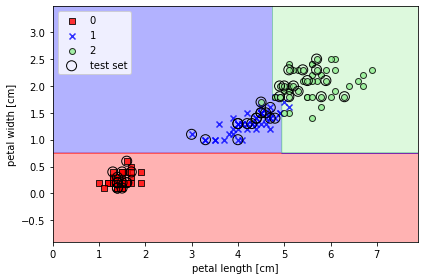

In [15]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_model.fit(X_train,y_train)
X_combined = np.vstack((X_train,X_test))
y_combined = np.hstack((y_train,y_test))

plot_decision_regions(X_combined, y_combined,classifier=tree_model,test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

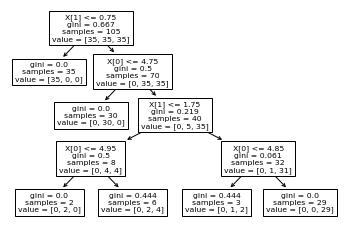

In [16]:
from sklearn import tree
tree.plot_tree(tree_model)
plt.show()

In [17]:
tree_model.predict([[4,1]])

array([1])

In [18]:
tree_model.tree_.max_depth

4